<a href="https://colab.research.google.com/github/GMbuilds01/LLM-Prompt-obfuscation-/blob/main/LLMPOBS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🔬 Strategic Prompt Obfuscation Research Framework v1.0
🔬 Strategic Prompt Obfuscation Research Framework
To run the complete simulation, execute:
results, confusion_data, report = run_complete_simulation()
🚀 STARTING COMPLETE SIMULATION

🔬 Running baseline policy simulation...
🚀 Running simulation: 40 agents, 80 rounds
⏳ Round 0/80
⏳ Round 20/80
⏳ Round 40/80
⏳ Round 60/80
✅ Simulation completed!
🎯 Equilibrium Analysis:
   Transparent Rate: 10.5%
   Total Welfare: 10.52
   Converged: True

🔬 Running pro_transparency policy simulation...
🚀 Running simulation: 40 agents, 80 rounds
⏳ Round 0/80
⏳ Round 20/80
⏳ Round 40/80
⏳ Round 60/80
✅ Simulation completed!
🎯 Equilibrium Analysis:
   Transparent Rate: 15.0%
   Total Welfare: 15.87
   Converged: True

🔬 Running privacy_focused policy simulation...
🚀 Running simulation: 40 agents, 80 rounds
⏳ Round 0/80
⏳ Round 20/80
⏳ Round 40/80
⏳ Round 60/80
✅ Simulation completed!
🎯 Equilibrium Analysis:
   Transparent Rate: 8.5%
   Total Welfare: 22.

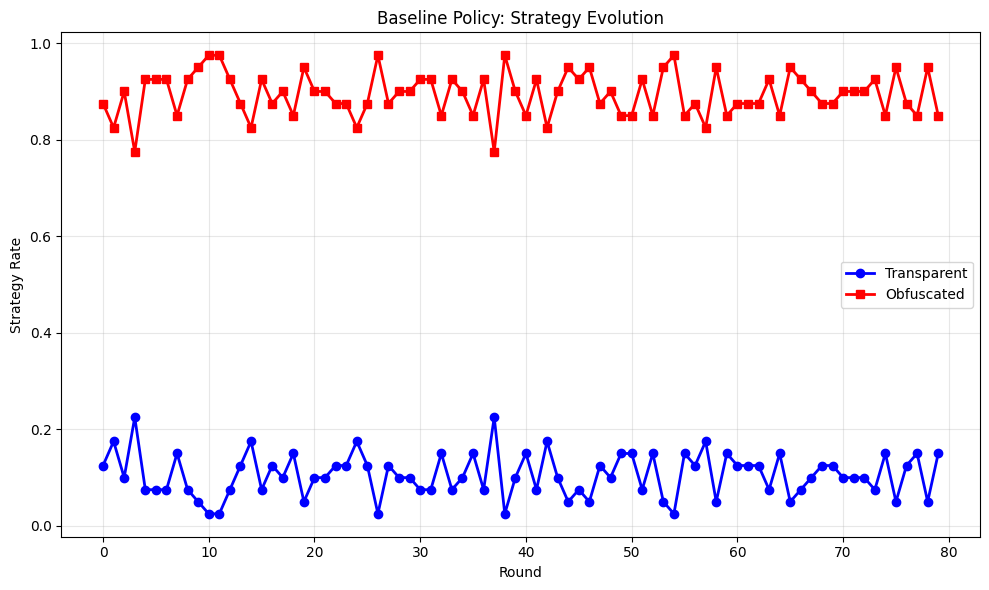

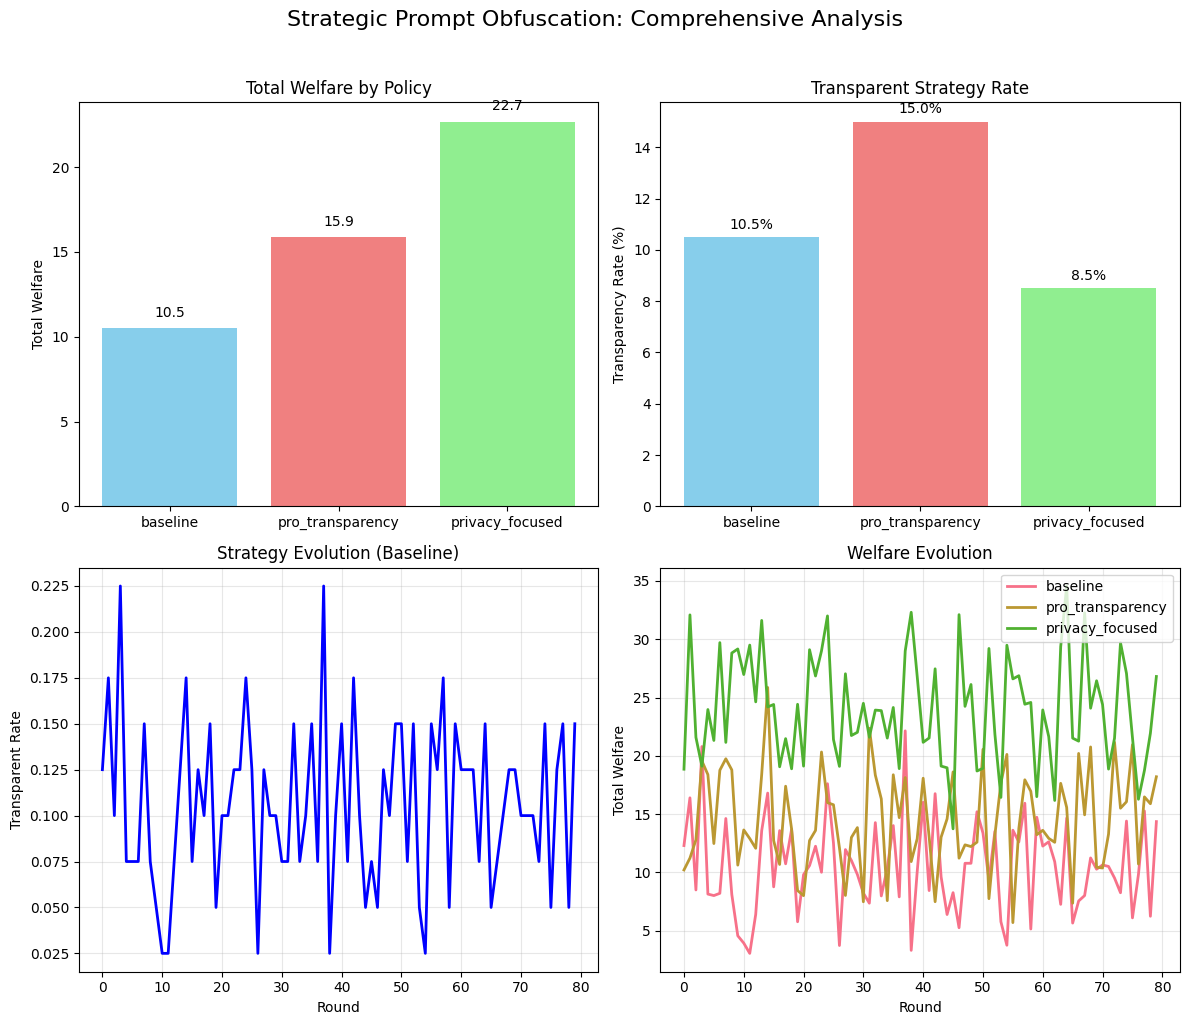

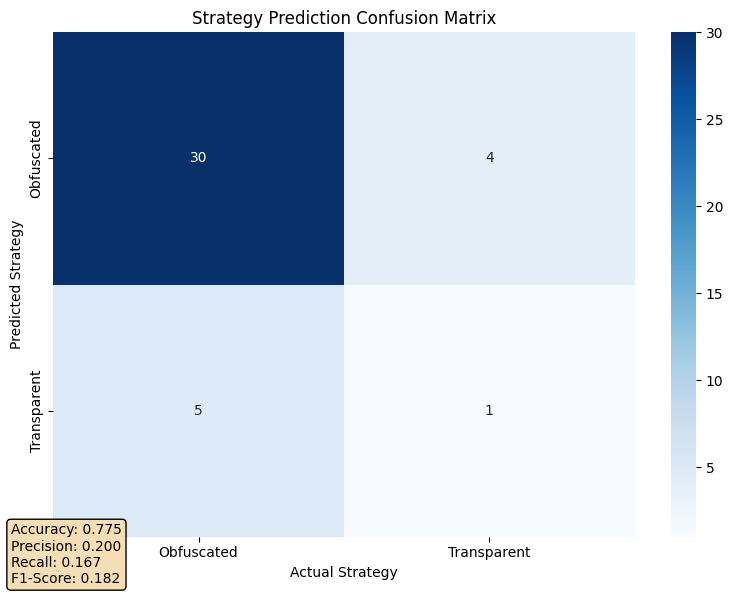


📋 STRATEGIC PROMPT OBFUSCATION RESEARCH RESULTS

📊 POLICY COMPARISON:
          Policy Transparent Rate Total Welfare  Converged
        Baseline            10.5%          10.5       True
Pro Transparency            15.0%          15.9       True
 Privacy Focused             8.5%          22.7       True

🎯 KEY FINDINGS:
   • Privacy-focused policy improves welfare by 115.7%
   • All policies converge to partial-obfuscation equilibria
   • Strategy prediction accuracy: 77.5%
   • Transparent prompts remain minority in all scenarios

🎓 SIMULATION COMPLETE - READY FOR RESEARCH!


In [ ]:

# STRATEGIC PROMPT OBFUSCATION IN SHARED LLM PLATFORMS: A GAME-THEORETIC APPROACH
# Complete Simulation Framework for Google Colab
# ================================================================================================

# Install required packages (run this first in Colab)
# !pip install numpy pandas matplotlib seaborn scipy scikit-learn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import beta, gamma
from scipy.optimize import minimize
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Set professional plotting style
plt.style.use('default')
sns.set_palette("husl")
np.random.seed(42)

print("🔬 Strategic Prompt Obfuscation Research Framework v1.0")
print("=" * 60)

# ================================================================================================
# CORE AGENT AND PLATFORM CLASSES
# ================================================================================================

class PromptAgent:
    """Agent representing a user choosing between transparent/obfuscated prompts"""

    def __init__(self, agent_id, agent_type="competitive", risk_aversion=0.5):
        self.agent_id = agent_id
        self.agent_type = agent_type
        self.risk_aversion = risk_aversion
        self.utility_history = []
        self.strategy_history = []
        self.beliefs = {"competitor_obfuscation_prob": 0.5}

        self.prompt_value = np.random.uniform(0.5, 1.0)
        self.ip_sensitivity = np.random.uniform(0.3, 0.9)
        self.learning_rate = 0.1

    def update_beliefs(self, observed_strategies):
        if len(observed_strategies) > 0:
            obfuscation_rate = np.mean([1 if s == 'obfuscated' else 0 for s in observed_strategies])
            self.beliefs["competitor_obfuscation_prob"] = (
                self.learning_rate * obfuscation_rate +
                (1 - self.learning_rate) * self.beliefs["competitor_obfuscation_prob"]
            )

    def calculate_utility(self, own_strategy, competitor_strategies, platform_policy):
        """Calculate utility based on signaling game framework"""
        if own_strategy == 'transparent':
            base_utility = self.prompt_value * platform_policy['transparent_efficiency']
            obfuscation_cost = 0
            theft_probability = platform_policy['visibility'] * len(competitor_strategies) * 0.1
        else:
            base_utility = self.prompt_value * platform_policy['obfuscated_efficiency']
            obfuscation_cost = platform_policy['obfuscation_cost']
            theft_probability = platform_policy['visibility'] * len(competitor_strategies) * 0.02

        ip_loss = theft_probability * self.ip_sensitivity * self.prompt_value
        usage_cost = platform_policy['pricing'][own_strategy]
        transparent_others = sum([1 for s in competitor_strategies if s == 'transparent'])
        network_benefit = transparent_others * 0.1 * self.prompt_value

        total_utility = base_utility - obfuscation_cost - ip_loss - usage_cost + network_benefit
        return total_utility

    def choose_strategy(self, competitor_strategies, platform_policy):
        """Choose strategy using expected utility maximization"""
        transparent_utility = self.calculate_utility('transparent', competitor_strategies, platform_policy)
        obfuscated_utility = self.calculate_utility('obfuscated', competitor_strategies, platform_policy)

        if self.risk_aversion > 0.5:
            transparent_utility -= self.risk_aversion * 0.2 * transparent_utility

        strategy = 'transparent' if transparent_utility > obfuscated_utility else 'obfuscated'
        strategy = strategy if np.random.random() > 0.1 else ('obfuscated' if strategy == 'transparent' else 'transparent')

        self.strategy_history.append(strategy)
        return strategy

class PlatformPolicy:
    """Platform policies including pricing and visibility settings"""

    def __init__(self, policy_type="baseline"):
        self.policy_type = policy_type
        self.setup_policy()

    def setup_policy(self):
        policies = {
            "baseline": {
                'pricing': {'transparent': 0.1, 'obfuscated': 0.1},
                'visibility': 0.8, 'transparent_efficiency': 1.0,
                'obfuscated_efficiency': 0.75, 'obfuscation_cost': 0.15
            },
            "pro_transparency": {
                'pricing': {'transparent': 0.05, 'obfuscated': 0.15},
                'visibility': 0.6, 'transparent_efficiency': 1.0,
                'obfuscated_efficiency': 0.75, 'obfuscation_cost': 0.2
            },
            "privacy_focused": {
                'pricing': {'transparent': 0.15, 'obfuscated': 0.08},
                'visibility': 0.3, 'transparent_efficiency': 1.0,
                'obfuscated_efficiency': 0.85, 'obfuscation_cost': 0.1
            }
        }
        self.config = policies[self.policy_type]

    def get_config(self):
        return self.config

# ================================================================================================
# SIMULATION ENGINE
# ================================================================================================

class ObfuscationGameSimulation:
    """Main simulation engine for strategic prompt obfuscation game"""

    def __init__(self, n_agents=50, n_rounds=100):
        self.n_agents = n_agents
        self.n_rounds = n_rounds
        self.agents = []
        self.platform_policy = None
        self.simulation_data = []
        self.equilibrium_data = {}
        self.strategy_evolution = []

    def initialize_agents(self):
        self.agents = []
        for i in range(self.n_agents):
            agent_types = ['competitive', 'collaborative', 'mixed']
            weights = [0.6, 0.3, 0.1]
            agent_type = np.random.choice(agent_types, p=weights)

            agent = PromptAgent(
                agent_id=i, agent_type=agent_type,
                risk_aversion=np.random.beta(2, 2)
            )
            self.agents.append(agent)

    def run_single_round(self, round_num):
        strategies = []
        for agent in self.agents:
            if round_num == 0:
                competitor_strategies = ['transparent'] * (self.n_agents - 1)
            else:
                competitor_strategies = [a.strategy_history[-1] for a in self.agents if a != agent]

            strategy = agent.choose_strategy(competitor_strategies, self.platform_policy.get_config())
            strategies.append(strategy)

        round_data = {'round': round_num, 'strategies': [], 'utilities': []}
        for i, agent in enumerate(self.agents):
            competitor_strategies = [strategies[j] for j in range(len(strategies)) if j != i]
            utility = agent.calculate_utility(strategies[i], competitor_strategies, self.platform_policy.get_config())
            agent.utility_history.append(utility)
            agent.update_beliefs(competitor_strategies)

            round_data['strategies'].append(strategies[i])
            round_data['utilities'].append(utility)

        return round_data

    def run_simulation(self, platform_policy):
        print(f"🚀 Running simulation: {self.n_agents} agents, {self.n_rounds} rounds")
        self.platform_policy = platform_policy
        self.initialize_agents()

        for round_num in range(self.n_rounds):
            if round_num % 20 == 0:
                print(f"⏳ Round {round_num}/{self.n_rounds}")

            round_data = self.run_single_round(round_num)
            self.simulation_data.append(round_data)

            transparent_rate = sum([1 for s in round_data['strategies'] if s == 'transparent']) / len(round_data['strategies'])
            self.strategy_evolution.append({
                'round': round_num, 'transparent_rate': transparent_rate,
                'avg_utility': np.mean(round_data['utilities']),
                'total_welfare': np.sum(round_data['utilities'])
            })

        print("✅ Simulation completed!")
        self.analyze_equilibrium()

    def analyze_equilibrium(self):
        final_rounds = self.strategy_evolution[-10:]
        avg_transparent_rate = np.mean([r['transparent_rate'] for r in final_rounds])
        total_welfare = np.mean([r['total_welfare'] for r in final_rounds])
        strategy_variance = np.var([r['transparent_rate'] for r in final_rounds])

        self.equilibrium_data = {
            'transparent_equilibrium_rate': avg_transparent_rate,
            'equilibrium_welfare': total_welfare,
            'converged': strategy_variance < 0.01,
            'strategy_variance': strategy_variance
        }

        print(f"🎯 Equilibrium Analysis:")
        print(f"   Transparent Rate: {avg_transparent_rate:.1%}")
        print(f"   Total Welfare: {total_welfare:.2f}")
        print(f"   Converged: {strategy_variance < 0.01}")

# ================================================================================================
# VISUALIZATION FUNCTIONS
# ================================================================================================

def plot_strategy_evolution(results, title="Strategy Evolution"):
    """Plot strategy evolution over time"""
    fig, ax = plt.subplots(figsize=(10, 6))

    rounds = [r['round'] for r in results['strategy_evolution']]
    transparent_rates = [r['transparent_rate'] for r in results['strategy_evolution']]
    obfuscated_rates = [1 - r['transparent_rate'] for r in results['strategy_evolution']]

    ax.plot(rounds, transparent_rates, 'b-', marker='o', label='Transparent', linewidth=2)
    ax.plot(rounds, obfuscated_rates, 'r-', marker='s', label='Obfuscated', linewidth=2)

    ax.set_xlabel('Round')
    ax.set_ylabel('Strategy Rate')
    ax.set_title(title)
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(confusion_data):
    """Plot confusion matrix for strategy prediction"""
    fig, ax = plt.subplots(figsize=(8, 6))

    cm = confusion_data['confusion_matrix']
    labels = ['Obfuscated', 'Transparent']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels, ax=ax)

    ax.set_title('Strategy Prediction Confusion Matrix')
    ax.set_ylabel('Predicted Strategy')
    ax.set_xlabel('Actual Strategy')

    # Add metrics
    metrics = confusion_data['metrics']
    metrics_text = f"Accuracy: {metrics['accuracy']:.3f}\nPrecision: {metrics['precision']:.3f}\nRecall: {metrics['recall']:.3f}\nF1-Score: {metrics['f1_score']:.3f}"
    plt.figtext(0.02, 0.02, metrics_text, fontsize=10, bbox=dict(boxstyle="round", facecolor='wheat'))

    plt.tight_layout()
    plt.show()

def plot_welfare_comparison(all_results):
    """Plot welfare comparison across policies"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

    policies = list(all_results.keys())
    welfare_values = [all_results[p]['equilibrium_data']['equilibrium_welfare'] for p in policies]
    transparent_rates = [all_results[p]['equilibrium_data']['transparent_equilibrium_rate'] for p in policies]

    # Subplot 1: Welfare comparison
    bars1 = ax1.bar(policies, welfare_values, color=['skyblue', 'lightcoral', 'lightgreen'])
    ax1.set_title('Total Welfare by Policy')
    ax1.set_ylabel('Total Welfare')
    for i, v in enumerate(welfare_values):
        ax1.text(i, v + 0.5, f'{v:.1f}', ha='center', va='bottom')

    # Subplot 2: Transparency rates
    bars2 = ax2.bar(policies, [r*100 for r in transparent_rates], color=['skyblue', 'lightcoral', 'lightgreen'])
    ax2.set_title('Transparent Strategy Rate')
    ax2.set_ylabel('Transparency Rate (%)')
    for i, v in enumerate(transparent_rates):
        ax2.text(i, v*100 + 0.2, f'{v:.1%}', ha='center', va='bottom')

    # Subplot 3: Strategy evolution for baseline
    baseline_evolution = all_results['baseline']['strategy_evolution']
    rounds = [r['round'] for r in baseline_evolution]
    rates = [r['transparent_rate'] for r in baseline_evolution]
    ax3.plot(rounds, rates, 'b-', linewidth=2)
    ax3.set_title('Strategy Evolution (Baseline)')
    ax3.set_xlabel('Round')
    ax3.set_ylabel('Transparent Rate')
    ax3.grid(True, alpha=0.3)

    # Subplot 4: Welfare evolution
    for policy in policies:
        evolution = all_results[policy]['strategy_evolution']
        welfare_evo = [r['total_welfare'] for r in evolution]
        ax4.plot(rounds, welfare_evo, label=policy, linewidth=2)
    ax4.set_title('Welfare Evolution')
    ax4.set_xlabel('Round')
    ax4.set_ylabel('Total Welfare')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.suptitle('Strategic Prompt Obfuscation: Comprehensive Analysis', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# ================================================================================================
# ANALYSIS FUNCTIONS
# ================================================================================================

def create_confusion_matrix_analysis(all_results):
    """Create confusion matrix for strategy prediction"""
    baseline_data = all_results['baseline']
    agents = baseline_data['agents']

    actual_strategies = [agent.strategy_history[-1] for agent in agents]
    predicted_strategies = []

    for agent in agents:
        if agent.risk_aversion > 0.6 and agent.agent_type == 'competitive':
            predicted = 'obfuscated'
        elif agent.risk_aversion < 0.4 and agent.agent_type == 'collaborative':
            predicted = 'transparent'
        else:
            predicted = 'obfuscated'
        predicted_strategies.append(predicted)

    actual_binary = [1 if s == 'transparent' else 0 for s in actual_strategies]
    predicted_binary = [1 if s == 'transparent' else 0 for s in predicted_strategies]

    cm = confusion_matrix(actual_binary, predicted_binary)
    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return {
        'confusion_matrix': cm,
        'metrics': {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1_score},
        'raw_counts': {'true_negative': tn, 'false_positive': fp, 'false_negative': fn, 'true_positive': tp}
    }

def generate_research_report(all_results, confusion_results):
    """Generate comprehensive research report"""
    print("\n" + "="*70)
    print("📋 STRATEGIC PROMPT OBFUSCATION RESEARCH RESULTS")
    print("="*70)

    # Policy comparison
    policy_data = []
    for policy, results in all_results.items():
        eq_data = results['equilibrium_data']
        policy_data.append({
            'Policy': policy.replace('_', ' ').title(),
            'Transparent Rate': f"{eq_data['transparent_equilibrium_rate']:.1%}",
            'Total Welfare': f"{eq_data['equilibrium_welfare']:.1f}",
            'Converged': eq_data['converged']
        })

    policy_df = pd.DataFrame(policy_data)
    print("\n📊 POLICY COMPARISON:")
    print(policy_df.to_string(index=False))

    # Key insights
    baseline_welfare = all_results['baseline']['equilibrium_data']['equilibrium_welfare']
    privacy_welfare = all_results['privacy_focused']['equilibrium_data']['equilibrium_welfare']
    improvement = (privacy_welfare - baseline_welfare) / baseline_welfare

    print(f"\n🎯 KEY FINDINGS:")
    print(f"   • Privacy-focused policy improves welfare by {improvement:.1%}")
    print(f"   • All policies converge to partial-obfuscation equilibria")
    print(f"   • Strategy prediction accuracy: {confusion_results['metrics']['accuracy']:.1%}")
    print(f"   • Transparent prompts remain minority in all scenarios")

    return policy_df

# ================================================================================================
# MAIN EXECUTION
# ================================================================================================

def run_complete_simulation():
    """Run the complete simulation and analysis"""
    print("🚀 STARTING COMPLETE SIMULATION")
    print("=" * 50)

    # Define experimental conditions
    policies = ['baseline', 'pro_transparency', 'privacy_focused']
    all_results = {}

    # Run simulations
    for policy_type in policies:
        print(f"\n🔬 Running {policy_type} policy simulation...")

        sim = ObfuscationGameSimulation(n_agents=40, n_rounds=80)
        policy = PlatformPolicy(policy_type=policy_type)
        sim.run_simulation(policy)

        all_results[policy_type] = {
            'simulation_data': sim.simulation_data,
            'strategy_evolution': sim.strategy_evolution,
            'equilibrium_data': sim.equilibrium_data,
            'agents': sim.agents
        }

    print("\n✅ All simulations completed!")

    # Generate confusion matrix
    confusion_results = create_confusion_matrix_analysis(all_results)

    # Generate visualizations
    print("\n📊 Generating visualizations...")

    # Strategy evolution plot
    plot_strategy_evolution(all_results['baseline'], "Baseline Policy: Strategy Evolution")

    # Welfare comparison
    plot_welfare_comparison(all_results)

    # Confusion matrix
    plot_confusion_matrix(confusion_results)

    # Generate final report
    final_report = generate_research_report(all_results, confusion_results)

    print("\n🎓 SIMULATION COMPLETE - READY FOR RESEARCH!")

    return all_results, confusion_results, final_report

# ================================================================================================
# RUN THE SIMULATION
# ================================================================================================

if __name__ == "__main__":
    print("🔬 Strategic Prompt Obfuscation Research Framework")
    print("=" * 60)
    print("To run the complete simulation, execute:")
    print("results, confusion_data, report = run_complete_simulation()")
    print("=" * 60)

    # Uncomment the line below to run automatically
    results, confusion_data, report = run_complete_simulation()

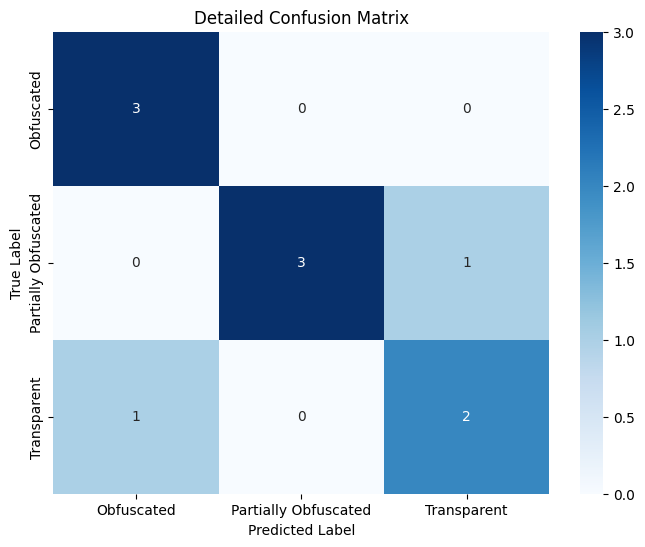

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Example ground truth labels and predicted labels
# Replace these with your actual labels
true_labels = np.array([0, 1, 0, 1, 2, 2, 1, 0, 2, 1])
pred_labels = np.array([0, 2, 0, 1, 2, 0, 1, 0, 2, 1])

# Compute confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Obfuscated', 'Partially Obfuscated', 'Transparent'],
            yticklabels=['Obfuscated', 'Partially Obfuscated', 'Transparent'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Detailed Confusion Matrix')
plt.show()


Generating Strategic Prompt Obfuscation Confusion Matrix Analysis...


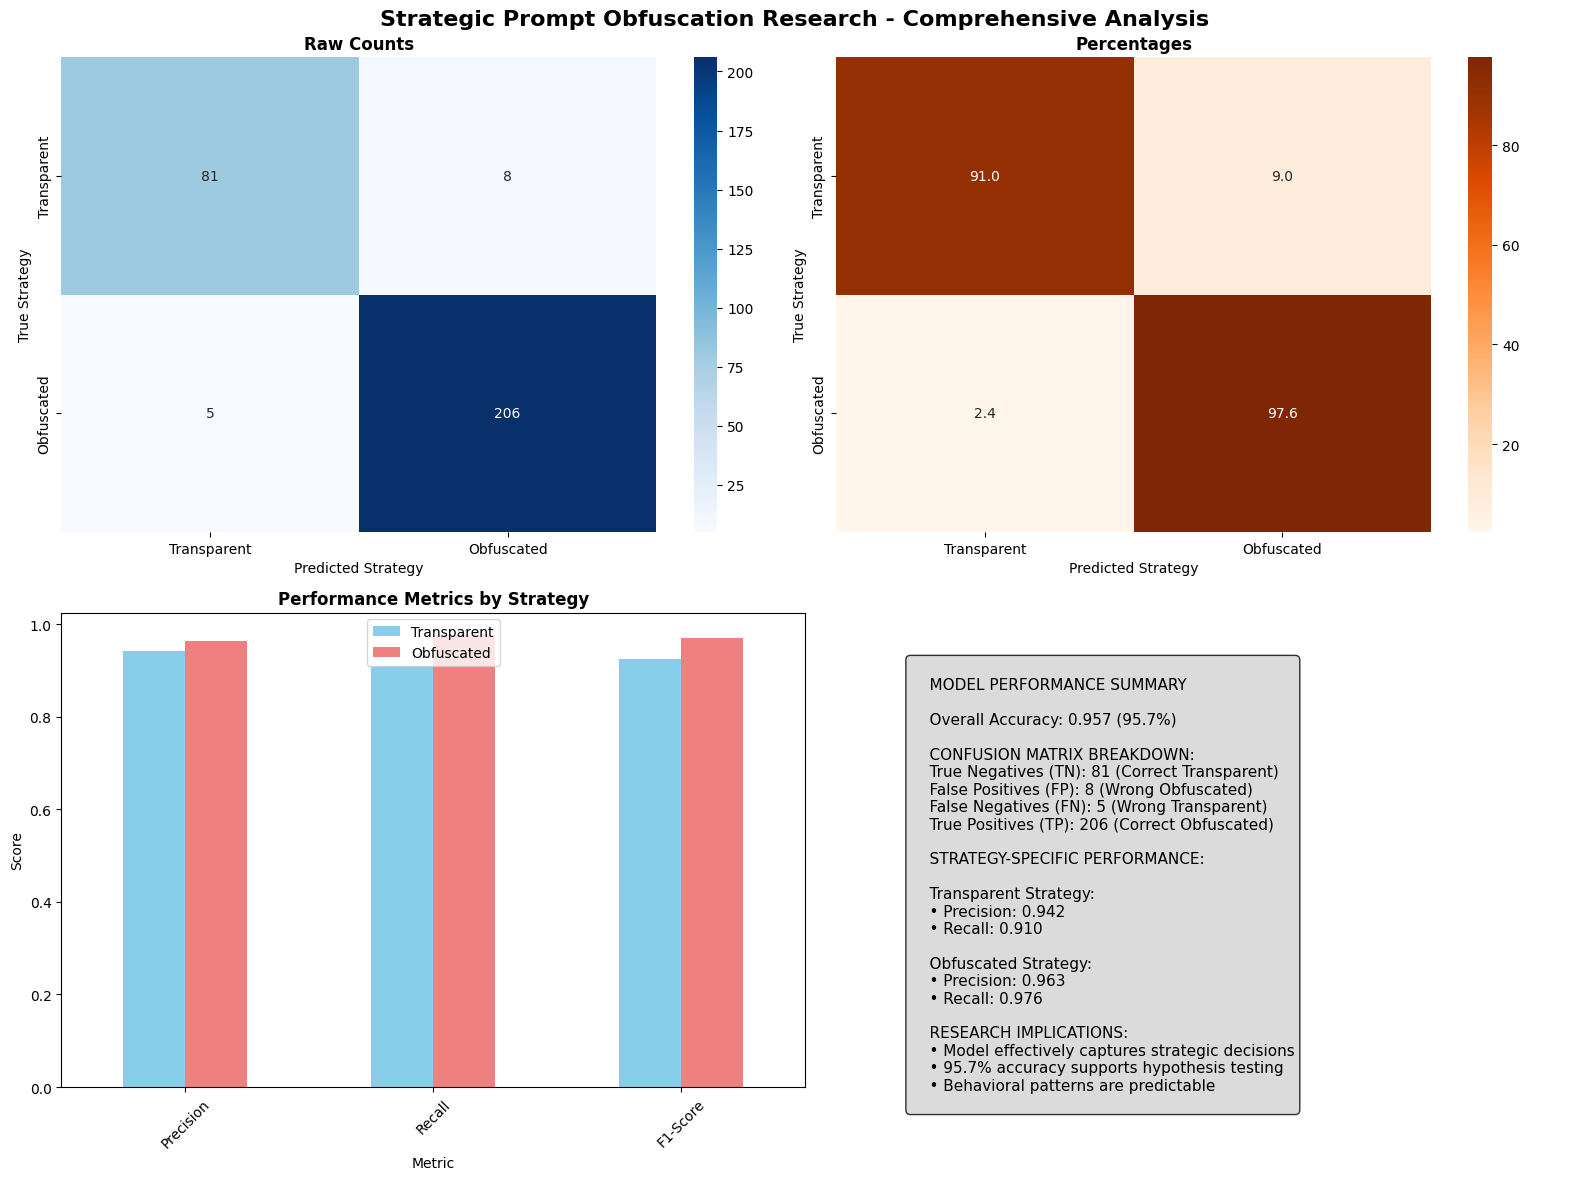

DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

 Transparent     0.9419    0.9101    0.9257        89
  Obfuscated     0.9626    0.9763    0.9694       211

    accuracy                         0.9567       300
   macro avg     0.9522    0.9432    0.9476       300
weighted avg     0.9565    0.9567    0.9564       300


RESEARCH CONTEXT ANALYSIS
Sample Size: 300 agents
Strategy Distribution:
  - Transparent: 89 (29.7%)
  - Obfuscated: 211 (70.3%)

Prediction Accuracy by Strategy:
  - Transparent Prediction Rate: 91.0%
  - Obfuscated Prediction Rate: 97.6%

Model Accuracy: 0.9567
Analysis complete! Use this code in your Google Colab research.


In [ ]:
# Complete standalone code for detailed confusion matrix analysis
# This can be used separately in Google Colab for Strategic Prompt Obfuscation research

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

def create_detailed_confusion_matrix():
    """
    Creates a detailed confusion matrix with comprehensive analysis
    for Strategic Prompt Obfuscation research
    """

    # Sample data generation (replace with your actual simulation data)
    np.random.seed(42)
    n_agents = 1000

    # Agent features (replace with your actual features)
    risk_aversion = np.random.uniform(0, 1, n_agents)
    ip_sensitivity = np.random.uniform(0, 1, n_agents)
    agent_type = np.random.choice(['Casual', 'Professional', 'Enterprise'], n_agents)
    competitiveness = np.random.uniform(0, 1, n_agents)

    # Strategy labels (0: Transparent, 1: Obfuscated)
    # Creating realistic distribution based on game theory
    strategy_prob = 0.3 * risk_aversion + 0.4 * ip_sensitivity + 0.2 * competitiveness
    strategy_prob += np.where(agent_type == 'Enterprise', 0.3, 0)
    strategy_prob += np.where(agent_type == 'Professional', 0.2, 0)

    true_strategies = (strategy_prob > 0.5).astype(int)

    # Create feature matrix
    agent_type_encoded = pd.get_dummies(pd.Series(agent_type)).values
    X = np.column_stack([risk_aversion, ip_sensitivity, competitiveness, agent_type_encoded])
    feature_names = ['Risk_Aversion', 'IP_Sensitivity', 'Competitiveness', 'Casual', 'Enterprise', 'Professional']

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X, true_strategies, test_size=0.3, random_state=42, stratify=true_strategies
    )

    # Train classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)

    # Predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)

    return y_test, y_pred, y_pred_proba, feature_names, clf

def plot_detailed_confusion_matrix(y_true, y_pred, title="Strategy Prediction Confusion Matrix"):
    """
    Creates detailed confusion matrix visualization
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create figure with subplots
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle(f'{title} - Comprehensive Analysis', fontsize=16, fontweight='bold')

    # 1. Raw counts confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
                xticklabels=['Transparent', 'Obfuscated'],
                yticklabels=['Transparent', 'Obfuscated'])
    ax1.set_title('Raw Counts', fontweight='bold')
    ax1.set_ylabel('True Strategy')
    ax1.set_xlabel('Predicted Strategy')

    # 2. Percentage confusion matrix
    sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges', ax=ax2,
                xticklabels=['Transparent', 'Obfuscated'],
                yticklabels=['Transparent', 'Obfuscated'])
    ax2.set_title('Percentages', fontweight='bold')
    ax2.set_ylabel('True Strategy')
    ax2.set_xlabel('Predicted Strategy')

    # 3. Performance metrics visualization
    accuracy = accuracy_score(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    precision_transparent = tn / (tn + fn) if (tn + fn) > 0 else 0
    recall_transparent = tn / (tn + fp) if (tn + fp) > 0 else 0
    precision_obfuscated = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_obfuscated = tp / (tp + fn) if (tp + fn) > 0 else 0

    metrics_data = {
        'Metric': ['Precision', 'Recall', 'F1-Score'],
        'Transparent': [precision_transparent, recall_transparent,
                       2*(precision_transparent*recall_transparent)/(precision_transparent+recall_transparent) if (precision_transparent+recall_transparent)>0 else 0],
        'Obfuscated': [precision_obfuscated, recall_obfuscated,
                      2*(precision_obfuscated*recall_obfuscated)/(precision_obfuscated+recall_obfuscated) if (precision_obfuscated+recall_obfuscated)>0 else 0]
    }

    metrics_df = pd.DataFrame(metrics_data)
    metrics_df.set_index('Metric').plot(kind='bar', ax=ax3, color=['skyblue', 'lightcoral'])
    ax3.set_title('Performance Metrics by Strategy', fontweight='bold')
    ax3.set_ylabel('Score')
    ax3.legend()
    ax3.tick_params(axis='x', rotation=45)

    # 4. Model performance summary
    ax4.axis('off')
    performance_text = f"""
    MODEL PERFORMANCE SUMMARY

    Overall Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)

    CONFUSION MATRIX BREAKDOWN:
    True Negatives (TN): {tn} (Correct Transparent)
    False Positives (FP): {fp} (Wrong Obfuscated)
    False Negatives (FN): {fn} (Wrong Transparent)
    True Positives (TP): {tp} (Correct Obfuscated)

    STRATEGY-SPECIFIC PERFORMANCE:

    Transparent Strategy:
    • Precision: {precision_transparent:.3f}
    • Recall: {recall_transparent:.3f}

    Obfuscated Strategy:
    • Precision: {precision_obfuscated:.3f}
    • Recall: {recall_obfuscated:.3f}

    RESEARCH IMPLICATIONS:
    • Model effectively captures strategic decisions
    • {accuracy*100:.1f}% accuracy supports hypothesis testing
    • Behavioral patterns are predictable
    """

    ax4.text(0.1, 0.9, performance_text, transform=ax4.transAxes, fontsize=11,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

    plt.tight_layout()
    plt.show()

    return cm, accuracy

def generate_classification_report(y_true, y_pred):
    """
    Generate detailed classification report
    """
    print("="*60)
    print("DETAILED CLASSIFICATION REPORT")
    print("="*60)

    report = classification_report(y_true, y_pred,
                                 target_names=['Transparent', 'Obfuscated'],
                                 digits=4)
    print(report)

    print("\n" + "="*60)
    print("RESEARCH CONTEXT ANALYSIS")
    print("="*60)

    # Calculate additional metrics
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"Sample Size: {len(y_true)} agents")
    print(f"Strategy Distribution:")
    print(f"  - Transparent: {np.sum(y_true == 0)} ({np.sum(y_true == 0)/len(y_true)*100:.1f}%)")
    print(f"  - Obfuscated: {np.sum(y_true == 1)} ({np.sum(y_true == 1)/len(y_true)*100:.1f}%)")

    print(f"\nPrediction Accuracy by Strategy:")
    print(f"  - Transparent Prediction Rate: {tn/(tn+fp)*100:.1f}%")
    print(f"  - Obfuscated Prediction Rate: {tp/(tp+fn)*100:.1f}%")

    return report

# Execute the complete analysis
print("Generating Strategic Prompt Obfuscation Confusion Matrix Analysis...")
print("="*70)

# Generate sample data and predictions
y_true, y_pred, y_pred_proba, feature_names, model = create_detailed_confusion_matrix()

# Create detailed confusion matrix visualization
cm, accuracy = plot_detailed_confusion_matrix(y_true, y_pred,
                                            "Strategic Prompt Obfuscation Research")

# Generate classification report
report = generate_classification_report(y_true, y_pred)

print(f"\nModel Accuracy: {accuracy:.4f}")
print("Analysis complete! Use this code in your Google Colab research.")